<h2> In this notebook, we will look at our dataset to get a feeling about the dataset
</h2>

We have a dataset regarding songs, their genre and some features. The genre is the thing we are trying to predict

In [2]:
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys

sys.path.insert(0,'..')

from src.data.make_dataset import create_labeled_data

root = Path('..')

In [3]:
df = create_labeled_data()

In [4]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration
count,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,8.816000e+04,88160.000000,88160.000000
mean,0.533840,0.643178,5.326146,-9.020196,0.664655,0.076771,0.263295,0.196546,0.208023,0.506016,122.271350,2.509988e+05,3.903187,252.571964
std,0.173465,0.247733,3.560088,4.457862,0.472114,0.085957,0.317896,0.324046,0.180317,0.257673,29.490601,1.083295e+05,0.407574,111.333765
min,0.000000,0.000020,0.000000,-53.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.373000e+03,0.000000,1.044440
25%,0.413000,0.468000,2.000000,-11.388000,0.000000,0.034300,0.006197,0.000004,0.096100,0.299000,99.182750,1.897600e+05,4.000000,189.700770
50%,0.539000,0.681000,5.000000,-8.129000,1.000000,0.045700,0.096300,0.001440,0.133000,0.507000,120.787000,2.336930e+05,4.000000,234.344040
75%,0.661000,0.857000,9.000000,-5.779000,1.000000,0.075900,0.478000,0.280000,0.273000,0.717000,140.015000,2.874270e+05,4.000000,289.540770
max,0.989000,1.000000,11.000000,4.785000,1.000000,0.956000,0.996000,1.000000,1.000000,1.000000,248.098000,3.405341e+06,5.000000,2626.455060


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88160 entries, 0 to 88159
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      88160 non-null  float64
 1   energy            88160 non-null  float64
 2   key               88160 non-null  int64  
 3   loudness          88160 non-null  float64
 4   mode              88160 non-null  int64  
 5   speechiness       88160 non-null  float64
 6   acousticness      88160 non-null  float64
 7   instrumentalness  88160 non-null  float64
 8   liveness          88160 non-null  float64
 9   valence           88160 non-null  float64
 10  tempo             88160 non-null  float64
 11  type              88160 non-null  object 
 12  uri               88160 non-null  object 
 13  analysis_url      88160 non-null  object 
 14  duration_ms       88160 non-null  int64  
 15  time_signature    88160 non-null  int64  
 16  track_id          88160 non-null  object

In [6]:
drop_cols = [
    'key'
    ,'mode'
    ,'type'
    ,'uri'
    ,'analysis_url'
    ,'duration_ms'
    ,'time_signature'
    ,'track_id'
    ,'response_artist'
    ,'response_track'
    ,'spotify_id'
    ,'duration'
    ,'tempo'
    ,'loudness'
]

df_features = df.drop(columns=drop_cols)


In [7]:
df_stack = df_features.melt(id_vars='genre')
df_stack

,genre,variable,value
0,Latin,danceability,0.489
1,World,danceability,0.497
2,Pop,danceability,0.680
3,Rock,danceability,0.318
4,Rock,danceability,0.600
...,...,...,...
617115,Rock,valence,0.707
617116,Jazz,valence,0.523
617117,Latin,valence,0.379
617118,Rock,valence,0.497


<AxesSubplot:xlabel='variable', ylabel='value'>

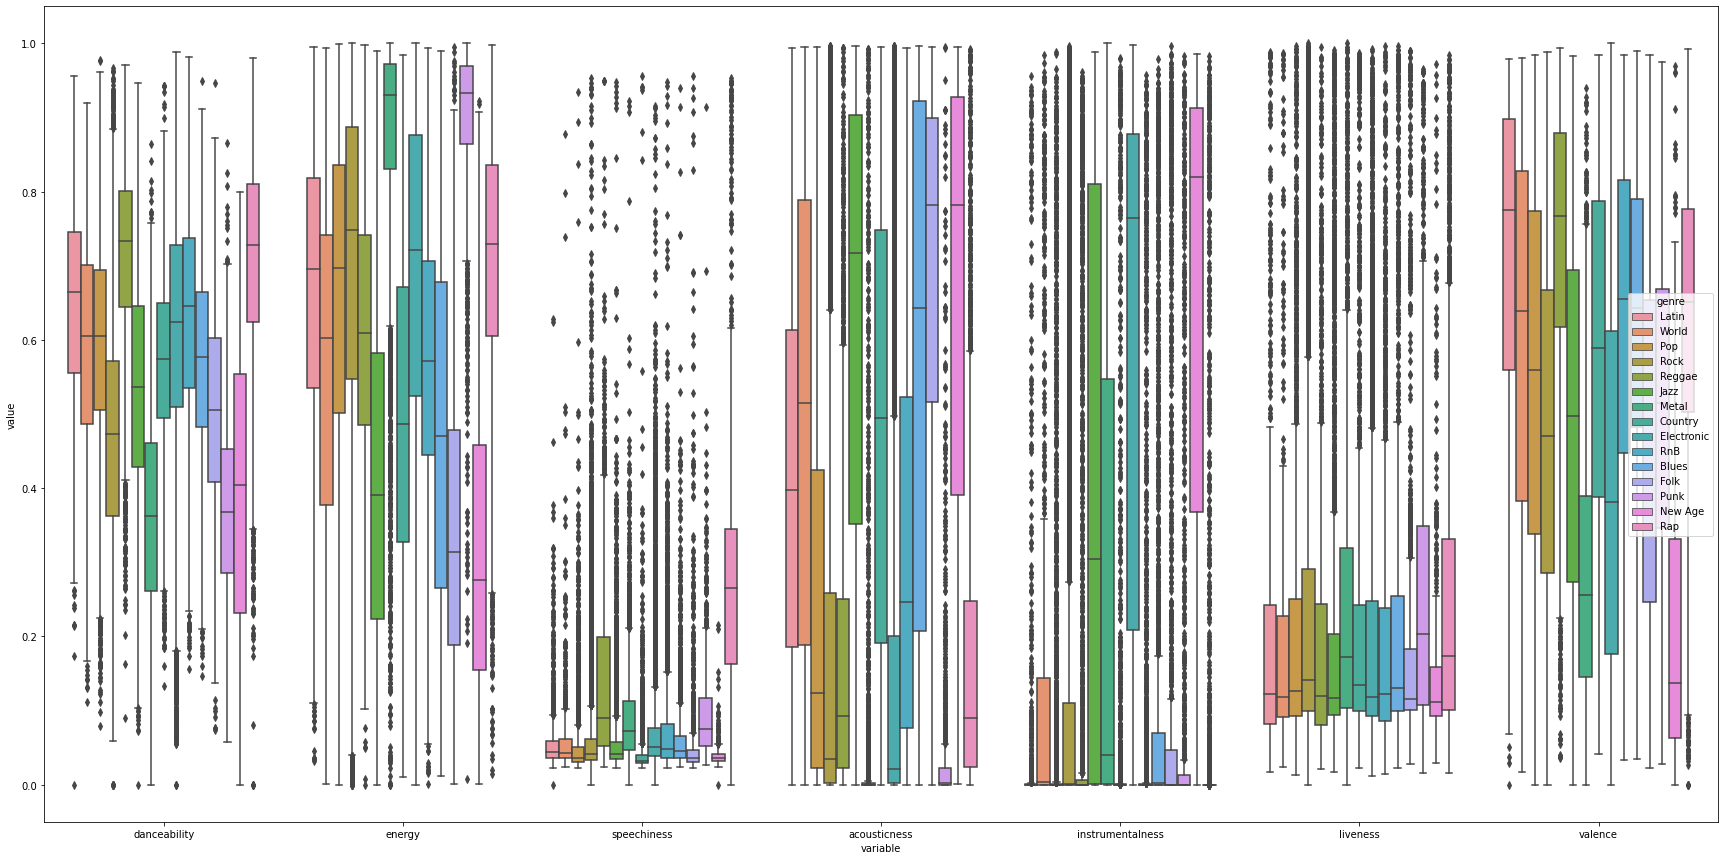

In [8]:
plt.figure(figsize=(30,15))
sns.boxplot(data = df_stack, x='variable',y='value',hue='genre')

<Figure size 1440x720 with 0 Axes>

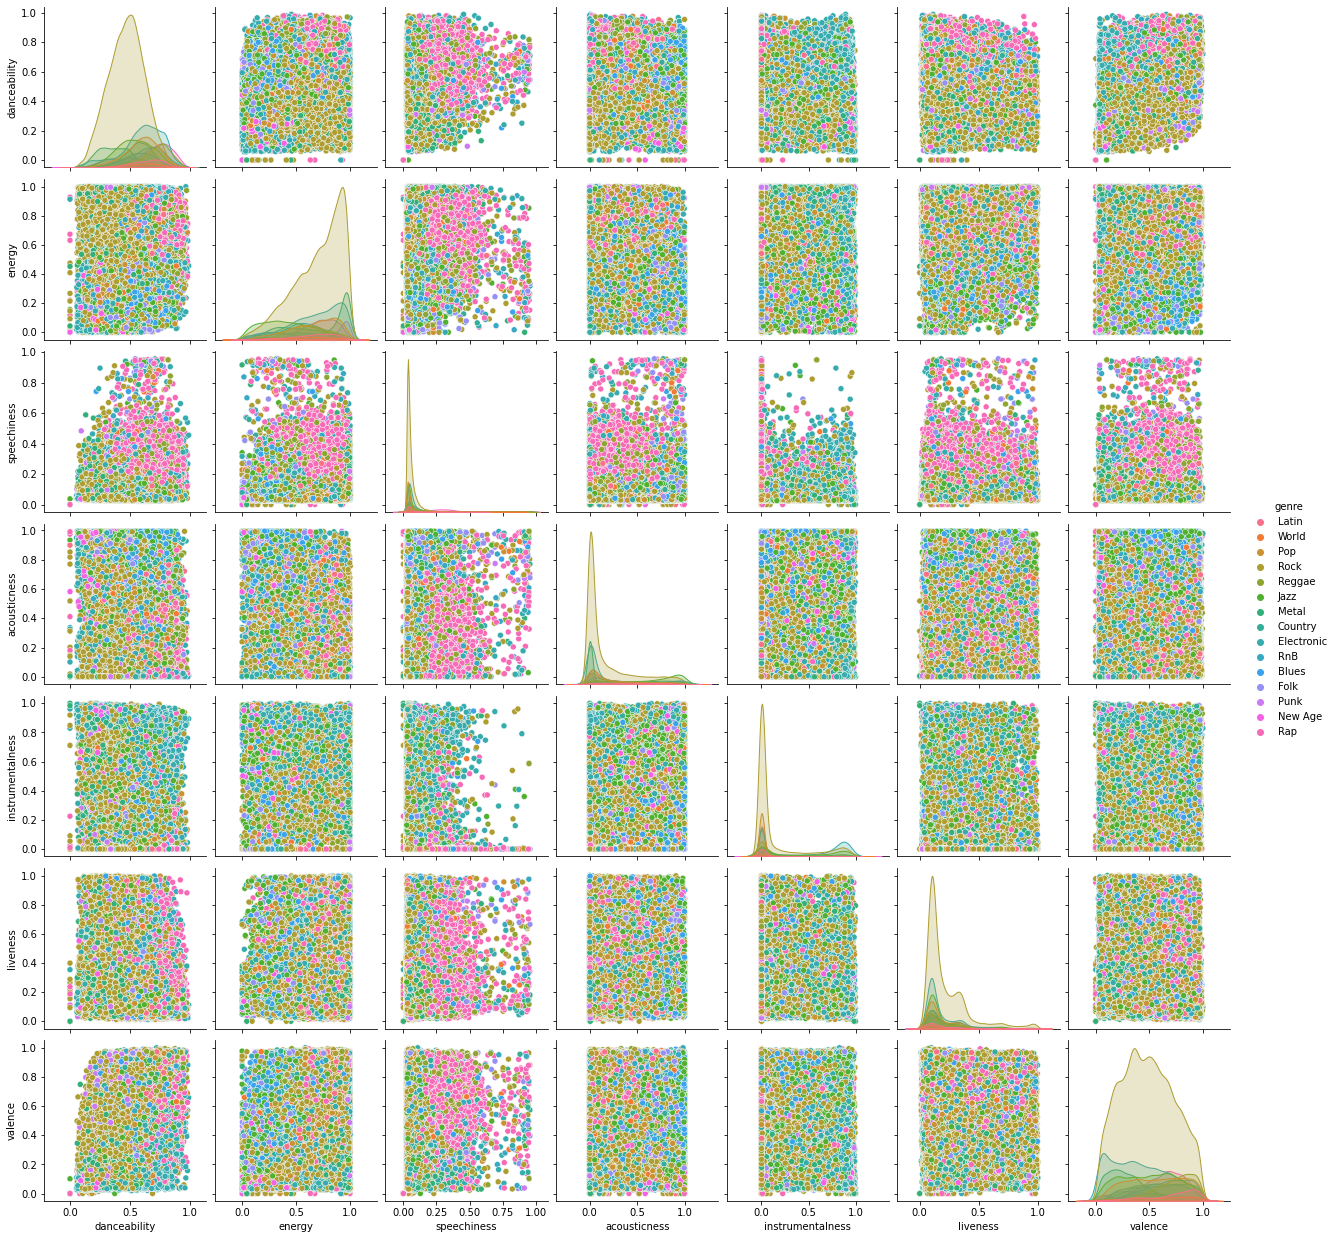

In [9]:
plt.figure(figsize=(20,10))
sns.pairplot(data=df_features,hue='genre',)

<AxesSubplot:xlabel='variable', ylabel='value'>

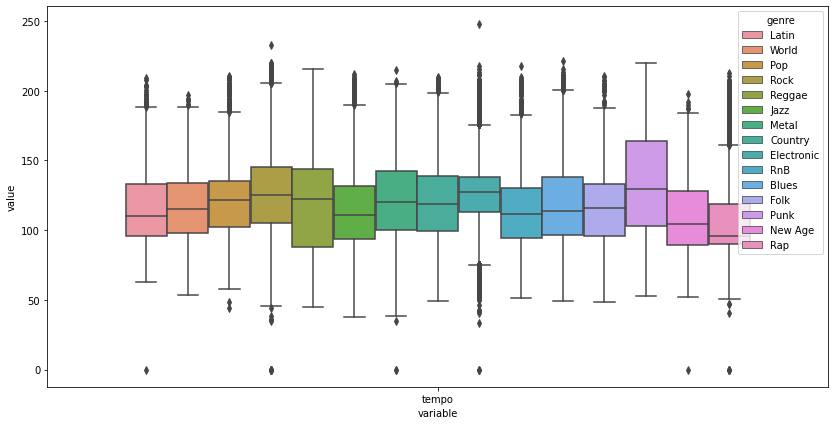

In [79]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df[['tempo','genre']].melt(id_vars='genre'),x='variable',y='value',hue='genre')

In [60]:
df_genre_counts = df['genre']

c:\Users\huube\OneDrive\Master of Informatics\Machine Learning\Eindopdracht\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'genre'